# check enviroment

In [1]:
from platform import python_version
import numpy, scipy, matplotlib, sklearn, keras
print("python", python_version())
print ("numpy", numpy.__version__)
print ("scipy", scipy.__version__)
print ("matplotlib", matplotlib.__version__)
print ("sklearn", sklearn.__version__)
print ("keras", keras.__version__)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


python 3.6.5
numpy 1.14.3
scipy 1.1.0
matplotlib 2.2.2
sklearn 0.19.1
keras 2.2.4


# download and process data

youtubeからmp3で池と滝の音データをダウロードします。

In [2]:
from __future__ import unicode_literals
import youtube_dl

# download audio files from youtube
def download_youtube_file(output_filename, download_link):
    ydl_opts = {
        'format': 'bestaudio/best',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'mp3',
            'preferredquality': '192'            
        }],
        'outtmpl': output_filename+'.%(ext)s'
    }
    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
        ydl.download([download_link])
    return
    
download_youtube_file("waterfall_1", "https://www.youtube.com/watch?v=OnMjo-CoOg8")    
download_youtube_file("waterfall_2", "https://www.youtube.com/watch?v=EoLhnbsWsOY")  
download_youtube_file("waterfall_3", "https://www.youtube.com/watch?v=FF2bhR7s3VY")  
download_youtube_file("pond_1", "https://www.youtube.com/watch?v=6VZxnWZcYLM")
download_youtube_file("pond_2", "https://www.youtube.com/watch?v=UN5hyc6OTX8")
download_youtube_file("pond_3", "https://www.youtube.com/watch?v=yYCqZSEtXiY")

[youtube] OnMjo-CoOg8: Downloading webpage
[youtube] OnMjo-CoOg8: Downloading video info webpage
[download] Destination: waterfall_1.m4a
[download] 100% of 54.53MiB in 00:16                          
[ffmpeg] Correcting container in "waterfall_1.m4a"
[ffmpeg] Destination: waterfall_1.mp3
Deleting original file waterfall_1.m4a (pass -k to keep)
[youtube] EoLhnbsWsOY: Downloading webpage
[youtube] EoLhnbsWsOY: Downloading video info webpage
[download] Destination: waterfall_2.m4a
[download] 100% of 13.78MiB in 00:06                  
[ffmpeg] Correcting container in "waterfall_2.m4a"
[ffmpeg] Destination: waterfall_2.mp3
Deleting original file waterfall_2.m4a (pass -k to keep)
[youtube] FF2bhR7s3VY: Downloading webpage
[youtube] FF2bhR7s3VY: Downloading video info webpage
[download] Destination: waterfall_3.m4a
[download] 100% of 27.46MiB in 00:07                          
[ffmpeg] Correcting container in "waterfall_3.m4a"
[ffmpeg] Destination: waterfall_3.mp3
Deleting original file wate

pydubを使って、youtubeのmp3ファイルをwavファイルに変換します。かつ、ダウンロードの音長さが長すぎますので、ファイルを細かく挟みます。

In [3]:
from pydub import AudioSegment
import os

# generate small audio files from the downloaded youtube files
def generate_small_audio_files(filename):
    mp3_file = filename+".mp3"
    sound = AudioSegment.from_mp3(mp3_file)
    sound.export(filename+".wav", format="wav")

    if not os.path.exists('audio_files'):
        os.makedirs('audio_files')
        
    count=1
    for i in range(1,1000,15):
        if count>50:
            break
        t1 = i * 1000 # in milliseconds
        t2 = (i+15) * 1000
        newAudio = AudioSegment.from_wav(filename+".wav")
        newAudio = newAudio[t1:t2]
        newAudio.export('audio_files/'+filename+"_"+str(count)+'.wav', format="wav")
        count+=1
    print (filename, count)
    return
generate_small_audio_files("waterfall_1")
generate_small_audio_files("pond_1")
generate_small_audio_files("waterfall_2")
generate_small_audio_files("pond_2")
generate_small_audio_files("waterfall_3")
generate_small_audio_files("pond_3")

waterfall_1 51
pond_1 51
waterfall_2 51
pond_2 51
waterfall_3 51
pond_3 51


ここまで、音ファイルの準備ができました。

次は音ファイルから、画像ファイルに変換します。今回の実験はCNNの画像モデルを使いたいからのです。

In [1]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from os import walk
import os

# convert audio files to wave figures
def convert_audio_to_wave(_name):
    if not os.path.exists("fig_wave"):
        os.makedirs("fig_wave")
    thing_wavs = []
    for (_,_,filenames) in walk("audio_files"):
        thing_wavs.extend(filenames)
        break
    for thing_wav in thing_wavs:
        input_data = read("audio_files/" + thing_wav)
        audio = input_data[1]
        f = plt.figure()
        plt.plot(audio)
        plt.ylabel("Amplitude")
        plt.xlabel("Time")
        plt.savefig("fig_wave/" + thing_wav.split('.')[0] + '.png')
        if thing_wav ==_name+"_1.wav":
            plt.show()
        f.clear()
        plt.close(f)
    return
convert_audio_to_wave("waterfall_1")
convert_audio_to_wave("pond_1")
convert_audio_to_wave("waterfall_2")
convert_audio_to_wave("pond_2")
convert_audio_to_wave("waterfall_3")
convert_audio_to_wave("pond_3")

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7564: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mlab.py:1274: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=0).
  "(=%d) >= signal length (=%d)." % (NFFT, len(x)))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:412: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:417: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\

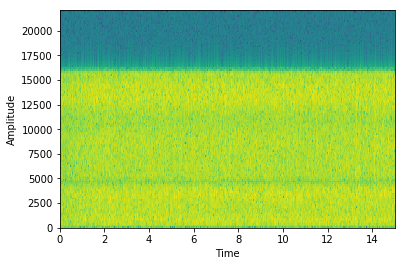

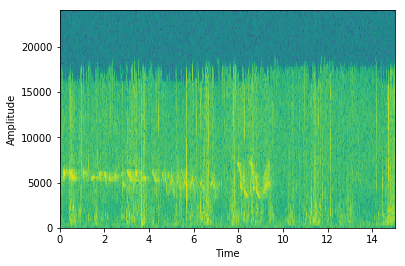

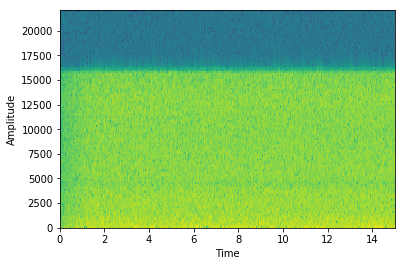

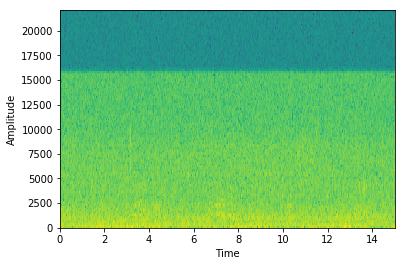

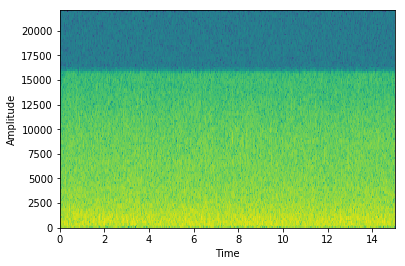

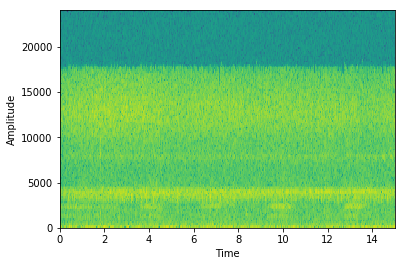

In [2]:
# convert audio files to specgram figures
def convert_audio_to_specgram(_name):
    if not os.path.exists("fig_specgram"):
        os.makedirs("fig_specgram")
    thing_wavs = []
    for (_,_,filenames) in walk("audio_files"):
        thing_wavs.extend(filenames)
        break
    for thing_wav in thing_wavs:
        samplingFrequency, signalData = read("audio_files/" + thing_wav)
        input_data = read("audio_files/" + thing_wav)
        f = plt.figure()
        plt.specgram(signalData[:,0], Fs=samplingFrequency)
        plt.ylabel("Amplitude")
        plt.xlabel("Time")
        plt.savefig("fig_specgram/" + thing_wav.split('.')[0] + '.png')
        if thing_wav ==_name+"_1.wav":
            plt.show()
        f.clear()
        plt.close(f)

convert_audio_to_specgram("waterfall_1")
convert_audio_to_specgram("pond_1")
convert_audio_to_specgram("waterfall_2")
convert_audio_to_specgram("pond_2")
convert_audio_to_specgram("waterfall_3")
convert_audio_to_specgram("pond_3")

In [ ]:
# 参考

In [ ]:
# https://github.com/dipanjanS/hands-on-transfer-learning-with-python/tree/master/notebooks
# https://towardsdatascience.com/audio-classification-with-pre-trained-vgg-19-keras-bca55c2a0efe
# https://medium.com/x8-the-ai-community/audio-classification-using-cnn-coding-example-f9cbd272269e